In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/sample_data/Turing/cardio_base.csv')

In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [ ]:
import pandas as pd

df['age'] = (df['age'] // 365.25).astype(int)

age_weight_means = df.groupby('age')['weight'].mean()
max_weight_age_group = age_weight_means.idxmax()
min_weight_age_group = age_weight_means.idxmin()

max_avg_weight = age_weight_means.max()
min_avg_weight = age_weight_means.min()
weight_difference = max_avg_weight - min_avg_weight

print(f"A diferença de peso entre o grupo etário com a maior média de peso ({max_weight_age_group} anos) e o grupo etário com a menor média de peso ({min_weight_age_group} anos) é {weight_difference:.2f} kg.")


A diferença de peso entre o grupo etário com a maior média de peso (63 anos) e o grupo etário com a menor média de peso (30 anos) é 16.85 kg.


In [31]:
import pandas as pd

if df['age'].max() > 100:
    df['age'] = (df['age'] // 365).astype(int)
else:
    df['age'] = df['age'].astype(int)

print(df[['age', 'cholesterol']].head())

over_50 = df[df['age'] > 50]
under_50 = df[df['age'] <= 50]
mean_cholesterol_over_50 = over_50['cholesterol'].mean()
mean_cholesterol_under_50 = under_50['cholesterol'].mean()

print("Nível médio de colesterol em pessoas com mais de 50 anos:", mean_cholesterol_over_50)
print("Nível médio de colesterol em pessoas com 50 anos ou menos:", mean_cholesterol_under_50)

if mean_cholesterol_over_50 > mean_cholesterol_under_50:
    print("Pessoas com mais de 50 anos têm níveis de colesterol mais elevados do que o resto.")
else:
    print("Pessoas com mais de 50 anos não têm níveis de colesterol mais elevados do que o resto.")

if mean_cholesterol_under_50 > 0:
    percent_difference = ((mean_cholesterol_over_50 - mean_cholesterol_under_50) / mean_cholesterol_under_50) * 100
    print(f"A diferença percentual no nível de colesterol é: {percent_difference:.2f}%")
else:
    print("Não é possível calcular a diferença percentual porque o nível médio de colesterol em pessoas com 50 anos ou menos é zero.")


   age  cholesterol
0   50            1
1   55            3
2   51            3
3   48            1
4   47            1
Nível médio de colesterol em pessoas com mais de 50 anos: 1.431323283082077
Nível médio de colesterol em pessoas com 50 anos ou menos: 1.2481322072437875
Pessoas com mais de 50 anos têm níveis de colesterol mais elevados do que o resto.
A diferença percentual no nível de colesterol é: 14.68%


In [34]:
import pandas as pd

men = df[df['gender'] == 1]
women = df[df['gender'] == 2]

smoking_men = men['smoke'].mean()
smoking_women = women['smoke'].mean()

print("Proporção de homens que fumam:", smoking_men)
print("Proporção de mulheres que fumam:", smoking_women)

if smoking_men > smoking_women:
    print("Homens têm mais probabilidade de fumar do que mulheres.")
    ratio = smoking_men / smoking_women
    print(f"Os homens têm {ratio:.2f} vezes mais probabilidade de fumar do que as mulheres.")
else:
    print("Mulheres têm mais probabilidade de fumar do que homens.")
    ratio = smoking_women / smoking_men
    print(f"As mulheres têm {ratio:.2f} vezes mais probabilidade de fumar do que os homens.")

if smoking_women > 0:
    percent_difference = ((smoking_men - smoking_women) / smoking_women) * 100
    print(f"A diferença percentual na probabilidade de fumar é: {percent_difference:.2f}%")
else:
    print("Não é possível calcular a diferença percentual porque a proporção de mulheres que fumam é zero.")


Proporção de homens que fumam: 0.017856358444981332
Proporção de mulheres que fumam: 0.21888026154474868
Mulheres têm mais probabilidade de fumar do que homens.
As mulheres têm 12.26 vezes mais probabilidade de fumar do que os homens.
A diferença percentual na probabilidade de fumar é: -91.84%


In [35]:
import pandas as pd

height_99_percentile = df['height'].quantile(0.99)
print(f"A altura correspondente ao 1% das pessoas mais altas é: {height_99_percentile:.2f} cm")


A altura correspondente ao 1% das pessoas mais altas é: 184.00 cm


In [36]:
import pandas as pd

correlation_matrix = df.corr()
print(correlation_matrix)
correlation_matrix_unstacked = correlation_matrix.abs().unstack()
sorted_correlations = correlation_matrix_unstacked.sort_values(kind="quicksort", ascending=False)
sorted_correlations = sorted_correlations[sorted_correlations != 1]
most_correlated_pair = sorted_correlations.idxmax()
most_correlated_value = sorted_correlations.max()

print(f"As duas colunas com a maior correlação são: {most_correlated_pair} com uma correlação de {most_correlated_value:.2f}")


                   id       age    gender    height    weight     ap_hi  \
id           1.000000  0.003836  0.003502 -0.003038 -0.001830  0.003356   
age          0.003836  1.000000 -0.022762 -0.081373  0.053567  0.020932   
gender       0.003502 -0.022762  1.000000  0.499033  0.155406  0.006005   
height      -0.003038 -0.081373  0.499033  1.000000  0.290968  0.005488   
weight      -0.001830  0.053567  0.155406  0.290968  1.000000  0.030702   
ap_hi        0.003356  0.020932  0.006005  0.005488  0.030702  1.000000   
ap_lo       -0.002529  0.017553  0.015254  0.006150  0.043710  0.016086   
cholesterol  0.006106  0.153998 -0.035821 -0.050226  0.141768  0.023778   
smoke       -0.003699 -0.047479  0.338135  0.187989  0.067780 -0.000922   

                ap_lo  cholesterol     smoke  
id          -0.002529     0.006106 -0.003699  
age          0.017553     0.153998 -0.047479  
gender       0.015254    -0.035821  0.338135  
height       0.006150    -0.050226  0.187989  
weight       0

In [37]:
import pandas as pd

mean_height = df['height'].mean()
std_height = df['height'].std()
lower_limit = mean_height - 2 * std_height
upper_limit = mean_height + 2 * std_height

outliers = df[(df['height'] < lower_limit) | (df['height'] > upper_limit)]
percentage_outliers = (len(outliers) / len(df)) * 100
print(f"Porcentagem de pessoas a mais de 2 desvios padrão da média: {percentage_outliers:.2f}%")


Porcentagem de pessoas a mais de 2 desvios padrão da média: 3.34%


In [48]:
import pandas as pd

df = pd.read_csv('/content/sample_data/Turing/cardio_base.csv')
df2 = pd.read_csv('/content/sample_data/Turing/cardio_alco.csv', sep=';')

print("Colunas do primeiro DataFrame (cardio_base.csv):")
print(df.columns)
print("\nColunas do segundo DataFrame (cardio_alco.csv):")
print(df2.columns)

if 'id' not in df.columns:
    df.rename(columns=lambda x: x.strip().lower(), inplace=True)

if 'id' not in df2.columns:
    df2.rename(columns=lambda x: x.strip().lower(), inplace=True)

df_merged = pd.merge(df, df2, on='id', how='inner')
print("\nPrimeiras linhas do DataFrame mesclado:")
print(df_merged.head())
df_merged['age'] = (df_merged['age'] // 365)
df_over_50 = df_merged[df_merged['age'] > 50]
df_over_50 = df_over_50.dropna(subset=['alco'])
percentage_alco_consumers = (df_over_50['alco'].sum() / len(df_over_50)) * 100

print(f"\nPorcentagem de pessoas com mais de 50 anos que consomem álcool: {percentage_alco_consumers:.2f}%")


Colunas do primeiro DataFrame (cardio_base.csv):
Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke'],
      dtype='object')

Colunas do segundo DataFrame (cardio_alco.csv):
Index(['id', 'alco'], dtype='object')

Primeiras linhas do DataFrame mesclado:
   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  smoke  alco
0  44  14605       1     159    60.0    110     70            1      0     0
1  45  20652       1     160    73.0    130     85            1      0     0
2  46  21940       2     173    82.0    140     90            3      0     0
3  47  20404       1     163    55.0    120     80            1      0     0
4  49  18328       2     175    95.0    120     80            1      0     0

Porcentagem de pessoas com mais de 50 anos que consomem álcool: 4.91%


In [50]:
from scipy import stats

smokers = df_merged[df_merged['smoke'] == 1]
non_smokers = df_merged[df_merged['smoke'] == 0]

t_stat, p_val = stats.ttest_ind(smokers['cholesterol'], non_smokers['cholesterol'])
print(f"Teste t para colesterol: t_stat = {t_stat}, p_val = {p_val}")
t_stat, p_val = stats.ttest_ind(smokers['weight'], non_smokers['weight'])
print(f"Teste t para peso: t_stat = {t_stat}, p_val = {p_val}")
men = df_merged[df_merged['gender'] == 2]
women = df_merged[df_merged['gender'] == 1]

t_stat, p_val = stats.ttest_ind(men['ap_hi'], women['ap_hi'])
print(f"Teste t para pressão arterial: t_stat = {t_stat}, p_val = {p_val}")
t_stat, p_val = stats.ttest_ind(smokers['ap_hi'], non_smokers['ap_hi'])
print(f"Teste t para pressão arterial entre fumantes e não fumantes: t_stat = {t_stat}, p_val = {p_val}")
alpha = 0.05

if p_val < alpha:
    print("Rejeitamos a hipótese nula com 95% de confiança.")
else:
    print("Não podemos rejeitar a hipótese nula com 95% de confiança.")

Teste t para colesterol: t_stat = 2.477034269271914, p_val = 0.013250800800403608
Teste t para peso: t_stat = 16.545691177666626, p_val = 2.3936615856960592e-61
Teste t para pressão arterial: t_stat = 1.5535737249702708, p_val = 0.12029169236848608
Teste t para pressão arterial entre fumantes e não fumantes: t_stat = -0.3359886334251424, p_val = 0.7368806768046338
Não podemos rejeitar a hipótese nula com 95% de confiança.


In [51]:
df3 = pd.read_csv('/content/sample_data/Turing/covid_data.csv')

In [55]:
import pandas as pd

italy_data = df3[df3['location'] == 'Italy']
germany_data = df3[df3['location'] == 'Germany']
italy_grouped = italy_data.groupby('date')['new_cases'].sum().cumsum()
germany_grouped = germany_data.groupby('date')['new_cases'].sum().cumsum()

combined_data = pd.DataFrame({
    'Italy': italy_grouped,
    'Germany': germany_grouped
}).fillna(0)
combined_data['Difference'] = combined_data['Italy'] - combined_data['Germany']
date_difference = combined_data[combined_data['Difference'] > 10000].index[0]

print(f"A diferença no número total de casos confirmados entre Itália e Alemanha tornou-se superior a 10.000 em: {date_difference}")


A diferença no número total de casos confirmados entre Itália e Alemanha tornou-se superior a 10.000 em: 2020-03-12


A diferença entre o valor previsto pela função exponencial e o número real de casos em 2020-03-20 é: 1711.692669342141


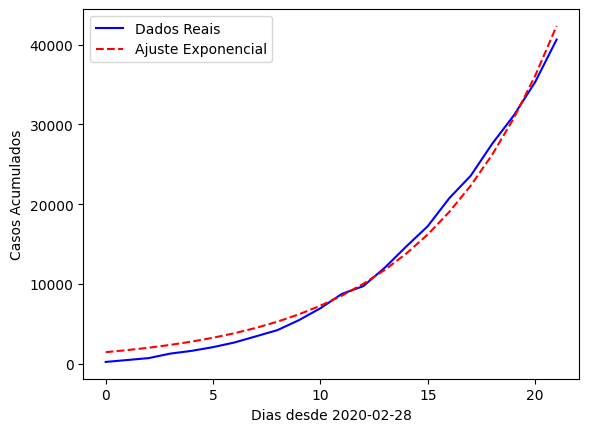

Diferença calculada: 1711.692669342141
Opção 11756: Diferença = 10044.307330657859
Opção 37414: Diferença = 35702.30733065786
Opção 187963: Diferença = 186251.30733065784
Opção 0: Diferença = 1711.692669342141
Opção 9785: Diferença = 8073.307330657859


In [57]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

italy_data = df3[(df3['location'] == 'Italy') &
                 (df3['date'] >= '2020-02-28') &
                 (df3['date'] <= '2020-03-20')]
italy_data_grouped = italy_data.groupby('date')['new_cases'].sum().cumsum().reset_index()
italy_data_grouped['days'] = (pd.to_datetime(italy_data_grouped['date']) - pd.to_datetime('2020-02-28')).dt.days

def exponential(x, A, B):
    return A * np.exp(B * x)

x_data = italy_data_grouped['days']
y_data = italy_data_grouped['new_cases']
params, covariance = curve_fit(exponential, x_data, y_data)
days_since_start = (pd.to_datetime('2020-03-20') - pd.to_datetime('2020-02-28')).days
predicted_cases = exponential(days_since_start, *params)
real_cases = italy_data_grouped.loc[italy_data_grouped['date'] == '2020-03-20', 'new_cases'].values[0]
difference = predicted_cases - real_cases

print(f"A diferença entre o valor previsto pela função exponencial e o número real de casos em 2020-03-20 é: {difference}")

plt.plot(x_data, y_data, 'b-', label='Dados Reais')
plt.plot(x_data, exponential(x_data, *params), 'r--', label='Ajuste Exponencial')
plt.xlabel('Dias desde 2020-02-28')
plt.ylabel('Casos Acumulados')
plt.legend()
plt.show()

opcoes = [11756, 37414, 187963, 0, 9785]
diferenca_real = np.abs(difference)
print("Diferença calculada:", diferenca_real)
for opcao in opcoes:
    print(f"Opção {opcao}: Diferença = {np.abs(diferenca_real - opcao)}")


In [59]:
import pandas as pd

total_deaths = df3.groupby('location')['new_deaths'].sum().reset_index()
population = df3.groupby('location')['population'].first().reset_index()
merged_df = pd.merge(total_deaths, population, on='location')
merged_df['death_rate'] = (merged_df['new_deaths'] / merged_df['population']) * 1e6
merged_df = merged_df.sort_values(by='death_rate', ascending=False)

third_highest_death_rate_country = merged_df.iloc[2]['location']
third_highest_death_rate = merged_df.iloc[2]['death_rate']

print(f"O país com a terceira maior taxa de mortalidade é: {third_highest_death_rate_country} com uma taxa de mortalidade de {third_highest_death_rate} mortes por milhão de habitantes.")


O país com a terceira maior taxa de mortalidade é: Andorra com uma taxa de mortalidade de 660.0660066006601 mortes por milhão de habitantes.


In [60]:
import pandas as pd
from sklearn.metrics import f1_score

df_filtered = df3.dropna(subset=['aged_65_older_percent', 'new_deaths', 'population'])
total_deaths = df_filtered.groupby('location')['new_deaths'].sum().reset_index()
population = df_filtered.groupby('location')['population'].first().reset_index()
merged_df = pd.merge(total_deaths, population, on='location')


merged_df['death_rate'] = (merged_df['new_deaths'] / merged_df['population']) * 1e6
aged_65_older_percent = df_filtered.groupby('location')['aged_65_older_percent'].first().reset_index()
merged_df = pd.merge(merged_df, aged_65_older_percent, on='location')
merged_df['over_65'] = merged_df['aged_65_older_percent'] > 20
merged_df['high_death_rate'] = merged_df['death_rate'] > 50

f1 = f1_score(merged_df['high_death_rate'], merged_df['over_65'])

print(f"O F1 score da afirmação é: {f1:.2f}")


O F1 score da afirmação é: 0.18


In [61]:
import pandas as pd

df_filtered = df3.dropna(subset=['gdp_per_capita', 'hospital_beds_per_thousand'])
df_filtered = df_filtered[df_filtered['hospital_beds_per_thousand'] >= 5]

total_countries = df_filtered['location'].nunique()
df_gdp_over_10000 = df_filtered[df_filtered['gdp_per_capita'] > 10000]
countries_gdp_over_10000 = df_gdp_over_10000['location'].nunique()
probability = countries_gdp_over_10000 / total_countries

print(f"A probabilidade de um país ter um PIB superior a $10.000, dado que possui pelo menos 5 leitos hospitalares por 1000 habitantes, é: {probability:.2f}")


A probabilidade de um país ter um PIB superior a $10.000, dado que possui pelo menos 5 leitos hospitalares por 1000 habitantes, é: 0.88
